# ECE 697 ST-Statistical Image Processing Homework 1

Tianyang Zhang 


problem 1 (a): for one x and one y, we have $p(y|x; \theta) =  h_{\theta}(yx) = \frac{1}{1+e^{-y \theta Tx}} $<br>
we can write the likehood as for x from 1 to m: <br>
$L(\theta) = p(y|X \theta) 
 = \prod_{i = 1}^{m} p(y|X \theta) = \prod_{i=1}^{m}(h_{\theta}(x^{(i)})^{y^{i}}(1-h_{\theta}(x^{(i)}))^{1-y^{(i)}}$<br>
now take the log likelihood, we get: <br>
$ l(\theta) = logL(\theta) = \sum_{i = 1}^{m}y^{(i)}logh_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$  <br>
our logistic function $h_{\theta(x)} = \frac{1}{1+e^{-\theta Tx}}$
which has the property that $ h_{\theta}(-xy) = 1 - h_{\theta}(xy)$
for the linear decision boundary we have: 
$ log \frac {h_{\theta}(x)}{1-h_{\theta}(x)} = \theta ^ {T} x$ <br>
so, the log likelihood should be:<br>
$l(\theta) = \sum_{i = 1}^{m} y^{(i)}log(\frac {h_{\theta}(x^{(i)}y^{(i)})}{1-h_{\theta}(y^{(i)}x^{(i)})})+log(1-h_{\theta}(x^{(i)}y^{(i)})) $<br>
$=  \sum_{i = 1}^{m} y^{(i)}(\theta ^{T} x^{(i)})+ log(1-h_{\theta}(x^{(i)}y^{(i)}))$<br>
$ =  \sum_{i = 1}^{m} y^{(i)}(\theta ^{T} x^{(i)})+ log(\frac {1}{1+e^{\theta^{T} x^{(i)}y^{(i)}}})$<br>
$ = \sum_{i = 1}^{m} log(\frac {e^{y^{(i)}x^{(i)}\theta}} {1+e^{\theta x^{(i)}y^{(i)}}})$<br>
$ = \sum_{i = 1}^{m} log(\frac {1}{1+e^{-y^{(i)}x^{(i)}\theta}}) $<br>
for the average of the empirical loss, to maxmize the likelihood is also means to minimize to negative likelihood:<br>
$ J(\theta)= - \frac{1}{m} \sum_{i = 1}^{m} log(\frac {1}{1+e^{-y^{(i)}x^{(i)}\theta}}) $<br>
$ = - \frac{1}{m} \sum_{i = 1}^{m} log(h_{\theta}(y^{(i)}x^{(i)}))$

problem 1 (b): <br>
our loss function is 
$J(\theta)= \frac {1}{m} \sum_{i=1}^{m} log(1+e^{-y^{(i)} \theta^{T} x^{(i)}}) $ <br>
do the first derivation <br>
$\frac{\partial j(\theta)}{\partial \theta_{k}} = \frac {1}{m} \sum_{i =1}^{m}\frac{e^{-y^{(i)}\theta^{T}x^{(i)}}}{1+e^{-y^{(i)}x^{(i)}\theta^{T}}} (-y^{(i)}x_{k}^{(i)})  $ <br>
we know that the derivative of the logistic function is <br>
$\nabla h_{\theta}(x) = h_{\theta}(x) (1-h_{\theta}(x)) $ <br>
so, <br>
$\frac{\partial j(\theta)}{\partial \theta_{k}} = \frac {1}{m} \sum_{i =1}^{m} h_{\theta}(-x^{(i)}y^{(i)})(-y^{(i)}x_{k}^{(i)})$ <br>
then we do the second derivative of logistic function: <br>
$ \frac{\partial ^{2} j(\theta)}{\partial \theta_{k} \partial \theta_{l}} = \frac{1}{m}\sum^{m}_{i = 1}
h_{\theta}(-x^{(i)}y^{(i)})(1-h_{\theta}(-x^{(i)}y^{(i)}))(-x_{k}^{(i)}y^{(i)})(-x_{l}^{(i)}y^{(i)})$ <br>
also, because our logistic function $h_{\theta(x)} = \frac{1}{1+e^{-\theta Tx}}$ <br>
which has the property that $h_{\theta}(-xy) = 1 - h_{\theta}(xy)$ <br>
so the Hessian H of this function is that: <br>
$H_{kl}  = \frac {1}{m}\sum^{m}_{i=1} h_{\theta}(-x^{(i)}y^{(i)})h_{\theta}(x^{(i)}y^{(i)})(x_{k}^{(i)}y^{(i)})(x_{l}^{(i)}y^{(i)}) $ <br>
the derivate of logistic function is the even function, for any $y^{i} \in ${-1,1}, it not influence the function,so 
$H = \frac {1}{m}\sum^{m}_{i=1} h_{\theta}(-x^{(i)})h_{\theta}(x^{(i)})(x^{(i)}y^{(i)})(x^{(i)}y^{(i)})^{T}$
To show $z^{T}Hz \geq 0$ <br>
$z^{T}Hz = z^{T}\frac {1}{m}\sum^{m}_{i=1} h_{\theta}(-x^{(i)})h_{\theta}(x^{(i)})(x^{(i)}y^{(i)})(x^{(i)}y^{(i)})^{T} z$
<br>
because the $h_{\theta}(-x^{(i)})$ and $h_{\theta}(x^{(i)})$ are $\geq 0$
and $(x^{(i)}y^{(i)})(x^{(i)}y^{(i)})^{T} \geq 0$ <br>
so we can say that the Hessian H is positive semidefinite 

probem 1 (c):
my code is below:

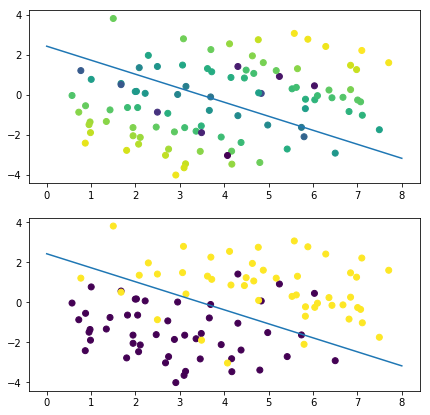

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    f = 1/(1+np.exp(-x))
    return f

def loss_function(x,y,theta):
    m = x.shape[0]
    loss = 0
    for i in range(m):
        loss += np.log((1+np.exp(np.dot(-x[i],theta)*y[i])))
    loss/=m
    return loss

def Hessian(x,theta):
    m = x.shape[0]
    feature = x.shape[1]
    scores = sigmoid(np.dot(-x,theta))*(sigmoid(np.dot(x,theta)))
    h = np.zeros((feature,feature))
    for i in range(m):
        h += np.outer(x[i],x[i])*scores[i]
    h /=m
    return h

def gradient(x,y,theta):
    m = x.shape[0]
    f = np.dot(sigmoid(np.dot(-x,theta)*y)*y,x)
    f /=m
    return f


x = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt')


m = x.shape[0]
feature = x.shape[1]
theta = np.zeros((feature)) 
theta = np.zeros(np.add(feature,1))   
x = np.hstack((np.ones((m,1)),x))
delta = 1e-9
change = 10000
i = 0

if change > delta:
    loss1 = loss_function(x,y,theta)
    theta -=np.dot(np.dot(np.linalg.inv(Hessian(x,theta)),gradient(x,y,theta)),loss_function(x,y,theta))
    i += 1
    new = loss_function(x,y,theta)
    change = loss1 - new



plt.figure(figsize = (7,7))
p = sigmoid(np.dot(-x,theta)*y)
plt.subplot(211)
plt.scatter(x[:,1],x[:,2],c = p)
a = np.arange(0,9)
b = (-theta[0]- np.dot(theta[1], a))/theta[2]
plt.plot(a,b)

plt.subplot(212)
plt.scatter(x[:,1],x[:,2],c = y)
x = np.arange(0,9)
y = (-theta[0]- np.dot(theta[1], x))/theta[2]

plt.plot(x,y)

plt.show()


problem 2 (a)
The exponential-family we have the equation like: <br>
$f_{y}(y|\lambda) = b(y) exp(\eta^{T} T(y)-a(\eta))  $ <br>
The Poisson distribution we have is that: <br>
$p(y;\lambda) = \frac{e^{-\lambda}\lambda^{y}}{y!}$<br>
$ log(p(y;\lambda)) = ylog(\lambda) - \lambda -log(y!)$ <br>
$p(y;\lambda) = exp(ylog(\lambda)-\lambda -log(y!))$<br>
$p(y;\lambda) = \frac {1}{y!}exp(ylog(\lambda)-\lambda)$<br>
so: <br>
$b(y) = \frac{1}{y!}$<br>
$ \eta = log(\lambda)$<br>
$a(\eta) = \lambda$<br>
$T(y)= y$<br>

problem 2 (b):<br>
For canonical responce function, we have: <br>
$g(\eta) = E[T(y);\eta]$<br>
Also, the poisson random variable with parameter $\lambda$ has mean $\lambda$<br>
so,
$g(\eta) = \lambda $ <br>
$log(\lambda) = \eta$<br>
$g(\eta)=e^{\eta}$

problem 2 (c)
for log-likllihood we expand from the exponential-family format and based on canonical responce function,we have:<br>
here we only look at the one example in the training dataset $x = x^{(i)}, y=y^{(i)}$: <br>
$L(y|x;\lambda) = \frac{1}{y!}exp(\eta^{T}y - e^{\eta}) $  <br>
$log(L(y|x;\lambda))=log(\frac{1}{y!}exp((\theta^{T} x)^{T} y-e^{\theta^{T} x}))$ <br>
$=-log(y!)+(\theta^{T}x)^{T}y-e^{\theta^{T}x}$<br>
take the derivative of the log-likelihood: <br>
$\nabla_{\theta} l(\theta_{j}) = x_{j}y - e^{\theta^{T}x}x_{j} $<br>
Then we use the stohastic gradient ascent to update my $\theta$<br>
$\theta \to \theta - $learning_rates $*( \nabla_{\theta} l(\theta_{j}))$<br>
$\theta \to \theta - $learning_rates $*(x_{j}y - e^{\theta^{T}x}x_{j})$<br>


problem 2 (d)
we have $T(y) = ,my$ and canonical responce function is $h(x)$ <br>
$f_{y}(y|\lambda) = b(y) exp(\eta^{T} y-a(\eta))$ <br>
$g(\eta) = h(\eta)$<br>
so the likelihood should be: <br>
$L(y|x;\lambda) = b(y) exp(\eta^{T}y-a(\eta))$<br>
take the log, we get:<br>
$l(y|x;\lambda) = log(b(y)) +\eta^{T}y-a(\eta)$<br>
we use generalized linear model which start with the exponential-family, we have,<br>
$ \eta=\theta^{T} x $<br>
so our log-likelihood should be:<br>
$l(y|x;\lambda) = log(b(y)) +(\theta^{T} x)^{T}y-a(\eta)$<br>
then we do the derivate of the likelihood: <br>
$\nabla_{\theta}l(\theta_{j}) = - \frac{\partial a(\eta)}{\partial \theta_{j}} + x^{T}_{j}y$<br>
The canonical responce function is h(x) = $\frac{\partial a(\eta)}{\partial \eta}$<br>
so, we substitute it into our function to get,<br>
$\nabla_{\theta}l(\theta_{j}) = -\frac{\partial \eta}{\partial \theta_{j}}{h(x)} + x^{T}_{j}y$<br>
$=-x_{j}^{T}{h(x)} + x^{T}_{j}y$<br>
then we use stocastic gradient ascent to update the $\theta$<br>
$\theta_{j} \to \theta_{j} -  \alpha*( \nabla_{\theta} l(\theta_{j}))$<br>
$\theta_{j} \to \theta_{j} - \alpha *(h(x) - y)x$<br>

problem 3 (a):
The given dataset consisting od m independent examples, for the posterior distribution of the label at x takes the form of a logistic function, we have:<br>
$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$<br>
also I think $p(y) = 1-\phi$ if y = -1 not y=0<br>
we first consider y=1, we have:<br>
$p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=-1)p(y=-1)}$ <br>
$= \frac{(\phi) \frac{1}{(2 \pi )^{n/2}|\sum|^{1/2}}exp(-\frac{1}{2}(x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1}))}{\frac{1}{(2 \pi )^{n/2}|\sum|^{1/2}}exp(-\frac{1}{2}(x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1}))(\phi)+\frac{1}{(2 \pi )^{n/2}|\sum|^{1/2}}exp(-\frac{1}{2}(x-\mu_{-1})^{T}\sum^{-1}(x-\mu_{-1}))(1-\phi)}$<br>
$ = \frac{exp(-\frac{1}{2}(x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1}))}{exp(-\frac{1}{2}(x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1}))(\phi)+exp(-\frac{1}{2}(x-\mu_{-1})^{T}\sum^{-1}(x-\mu_{-1}))(1-\phi)}$<br>
$= \frac{1}{1+ \frac{(1-\phi)}{\phi}exp(- \frac{1}{2}((x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1})+(x-\mu_{-1})^{T}\sum^{-1}(x-\mu_{-1})))}$<br>
$= \frac{1}{1+ exp(log(\frac{(1-\phi)}{\phi}) - \frac{1}{2}((x-\mu_{1})^{T}\sum^{-1}(x-\mu_{1})+(x-\mu_{-1})^{T}\sum^{-1}(x-\mu_{-1})))} $<br>
In the exp form, we expand it to get:<br>
$exp(log(\frac{1-\phi}{\phi})+ (\mu_{1}-\mu_{-1})\sum^{-1} x + \frac{1}{2}(\mu_{-1}+ \mu_{1})^{T}(\mu_{1}-\mu_{-1})\sum^{-1}) $<br>
now we let: <br>
$\theta = (\mu_{1}-\mu_{-1})\sum^{-1}$<br>
$\theta_{0} = \frac{1}{2}(\mu_{-1}+ \mu_{1})^{T}(\mu_{1}-\mu_{-1})\sum^{-1} $<br>
for y=-1, the same result as above.

problem 3 (b)
for the likelihood of the estimates $\mu_{1},\mu_{-1},\sum $ and $\phi$,because 
we need model the joint distrubution of (x,y), we use the generalize analysis to calculate the likelihood function,<br>
$l(\mu_{1},\mu_{-1},\sum ,\phi) = log( \prod_{i=1}^{m} p(x|y;\mu_{1},\mu_{-1},\sum)p(y;\phi) )$<br>
$ = \sum^{m}_{i=1} log(\frac{1}{(2\pi^{n/2})|\sum|^{1/2}})-\frac{1}{2}(x^{(i)}-\mu_{y_{(i)}})^{T} \sum^{-1}(x^{(i)}-\mu_{y_{(i)}})+(log(\phi^{\frac{y_{(i)}+1}{2}}(1-\phi)^{\frac{(y_{(i)}-1)}{-2}}))$<br>
$ = \sum_{i=1}^{m}(-\frac{2}{n}log(2\pi)-\frac{1}{2}log(\sum)-\frac{1}{2}(x^{(i)}-\mu_{(y_{(i)})})^{T} \sum^{-1} (x^{(i
)}-\mu_{y_{(i)}}) + \frac{y_{(i)}+1}{2}log(\phi) -\frac{y_{(i)}-1}{2}log(1-\phi) )$<br>
then we take the derivate of the likelihood function,<br>
$\nabla_{\phi} l(\mu_{1},\mu_{-1},\sum ,\phi)= $<br>


for $\sum$  we consider $\sum^{-1}$first,<br>
$\nabla_{\sum^{-1}} l(\mu_{1},\mu_{-1},\sum ,\phi) = \frac{1}{2} \sum_{i=1}^{m}(
\frac{1}{\sum^{-1}}- (x^{(i)}-\mu_{(y_{(i)})})^{T}(x^{(i)}-\mu_{(y_{(i)})})) =0$
so,<br>
$\frac{m}{\sum^{-1} }=\sum_{i=1}^{m} (x^{(i)}-\mu_{(y_{(i)})})^{T}(x^{(i)}-\mu_{(y_{(i)})})$<br>
$\sum = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)}-\mu_{(y_{(i)})})^{T}(x^{(i)}-\mu_{(y_{(i)})}) $<br>

for $\mu_{1}$<br>
$\nabla_{\mu_{-1}} l(\mu_{1},\mu_{-1},\sum ,\phi) = -\frac{1}{2} \sum_{y^{(i)}=-1}\nabla_{-1} (-2\mu^{T}_{-1}\sum^{-1}x^{(i)}+\mu^{T}_{-1}\sum^{-1}\mu_{-1}) = 0  $ <br>
so, $\sum^{-1}\mu_{-1}\sum^{m}_{i=1}1\{ y^{(i)} = -1\} = \sum^{-1}\sum^{m}_{i = 1} 1\{ y^{(i)} = -1 \} x^{(i)} $<br>
$\mu_{-1} =\frac{\sum^{m}_{i = 1} 1\{ y^{(i)} = -1 \} x^{(i)}}{\sum^{m}_{i=1}1\{ y^{(i)} = -1\}} $<br>

The same for $\mu_{-1}$


[3. 3. 3. 3. 6.]
[array([195, 205, 226]), array([195, 205, 226]), array([ 32, 195, 205]), array([  6, 195, 205]), array([  6,  18,  32, 195, 205, 226])]


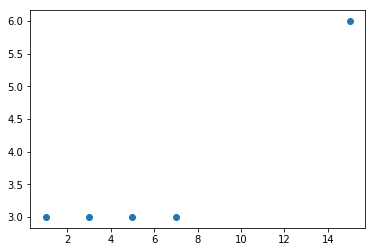

In [212]:
# problem 4 
# part a
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# define the matrix for each input train_x and test_x and the output is the matrix with dimention num_test * num_trian
# use the L2 distance 
def distance_matrix(train_x, test_x):
    num_train = train_x.shape[0]
    x1 = np.sum(train_x**2,axis = 1)    
    x2 = np.sum(test_x**2,axis = 1)
    
    dist = np.sqrt( x2[:,None] +x1 -2*np.dot(test_x,train_x.T))
    
    return dist

# define the knn prediction for nearest neighbor k

def train_predict(train_x,train_y,test_x,k):
    num_test = test_x.shape[0]
    loss = distance_matrix(train_x,test_x)
    #sort the loss matrix from low to high 
    idx = np.argsort(loss,axis=1)
    
    label = np.zeros((num_test,))
    # find first k labels from sorted matrix 
    knn = train_y[idx[:,:k]]
    knn = knn.astype(int)
    
    for i in range(num_test):
        label[i] = np.argmax(np.bincount(knn[i]))
  
    return label


train = np.loadtxt('zip.train')
test = np.loadtxt('zip.test')



pd1 = pd.DataFrame(train)
pd2 = pd.DataFrame(test)

# select the label 2 and label 5 data from dataset 
train1 = pd1[pd1[0]==2]
test1 = pd2[pd2[0]==2]
train1 = train1.append(pd1[pd1[0]==5])
test1 = test1.append(pd2[pd2[0]==5])

# create the train_x, train_y test_x and test_y 
train_y = train1[0]
train_x = train1.drop([0],axis = 1)
test_y = test1[0]
test_x = test1.drop([0],axis = 1)

train_y= train_y.get_values()
train_x= train_x.get_values()
test_y= test_y.get_values()
test_x= test_x.get_values()


#train the KNN
k_choices = [1, 3, 5,7,15]
error = []
error_location = []
for k in k_choices:
    y_pre = train_predict(train_x,train_y,test_x,k)
    error = np.append(error,np.sum(y_pre != test_y))  
    error_location += np.where(y_pre != test_y)

print(error)
print(error_location)
# the test error for KNN each K
f =lambda k: len(test_y[error_location[k]])
n = [1,3,5,7,15]
a = np.arange(0,5)
c =np.zeros((5))
for b in a: 
    c[b] = f(b)
plt.scatter(n,c)
plt.show()
value_knn = np.concatenate(error_location)


In [213]:
#for logistic regression as the part we already done in problem 2
# for part a 
def sigmoid(x):
    f = 1/(1+np.exp(-x))
    return f

def loss_function(x,y,theta):
    m = x.shape[0]
    loss = 0
    for i in range(m):
        loss += np.log((1+np.exp(np.dot(-x[i],theta)*y[i])))
    loss/=m
    return loss

def Hessian(x,theta):
    m = x.shape[0]
    feature = x.shape[1]
    scores = sigmoid(np.dot(-x,theta))*(sigmoid(np.dot(x,theta)))
    h = np.zeros((feature,feature))
    for i in range(m):
        h += np.outer(x[i],x[i])*scores[i]
    h /=m
    return h

def gradient(x,y,theta):
    m = x.shape[0]
    f = np.dot(sigmoid(np.dot(-x,theta)*y)*y,x)
    f /=m
    return f

y = np.zeros((len(train_y),))
# transfer the label to {-1,1}
for i in range(len(train_y)):
    if train_y[i] == 2:
        y[i] = -1
    else:
        y[i] = 1

m = train_x.shape[0]
mu = test_x.shape[0]
feature = train_x.shape[1]
# add the bias on the first row of the train_x and test_x
theta = np.zeros((feature)) 
theta = np.zeros(np.add(feature,1))   
x = np.hstack((np.ones((m,1)),train_x))
testx = np.hstack((np.ones((mu,1)),test_x))

delta = 1e-4
change = 1000
step = 0.0001


while(1):
    if np.abs(change) > delta:
        loss1 = loss_function(x,y,theta)
        theta -=step*np.dot(np.dot(np.linalg.inv(Hessian(x,theta)),gradient(x,y,theta)),loss_function(x,y,theta))
        new = loss_function(x,y,theta)
        change = loss1 - new
    else:
        break

y_pre_log = np.zeros((mu,))
h = sigmoid(np.dot(testx,theta))

for i in range(len(h)):
    if h[i] >0.5:
        y_pre_log[i] = 2
    else:
        y_pre_log[i] = 5
   
error = np.sum(y_pre_log != test_y)
print(error)
error_location_rg = np.where(y_pre_log != test_y)

value_lr = np.concatenate(error_location_rg)

# part b
# the best k values with lowest error on test set is 1,3,5 and 7


12


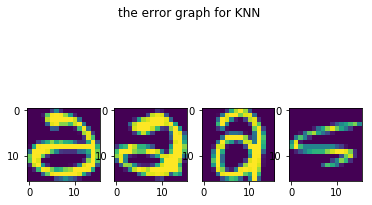

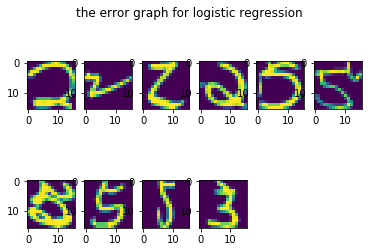

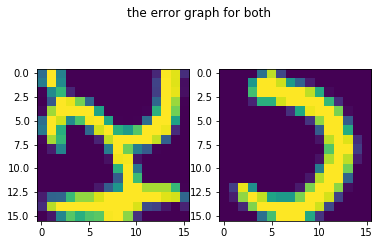

In [217]:
# part c 

KNNnotLR = np.setdiff1d(value_knn, value_lr)
LRnotKNN = np.setdiff1d(value_lr,value_knn)
both = np.intersect1d(value_lr,value_knn)
image_KNNnotLR = []
image_LRnotKNN = []
image_both = []
for i in KNNnotLR:
    image_KNNnotLR.append(test_x[i].reshape((16,16)))
for i in LRnotKNN:
    image_LRnotKNN.append(test_x[i].reshape((16,16)))
for i in both:
    image_both.append(test_x[i].reshape((16,16)))

plt.figure(1)
plt.suptitle('the error graph for KNN')
for i in range(len(image_KNNnotLR)):
    plt.subplot(1,len(image_KNNnotLR),i+1)
    plt.imshow(image_KNNnotLR[i])

plt.figure(2)
plt.suptitle('the error graph for logistic regression')
for i in range(len(image_LRnotKNN)):
    plt.subplot(2,len(image_LRnotKNN)/2+1,i+1)
    plt.imshow(image_LRnotKNN[i])

plt.figure(3)
plt.suptitle('the error graph for both')
for i in range(len(image_both)):
    plt.subplot(1,len(image_both),i+1)
    plt.imshow(image_both[i])


In [122]:
# part d
import random
shuffle = random.sample(range(train_x.shape[1]),train_x.shape[1])

random_train_x = np.zeros((train_x.shape))
random_test_x = np.zeros((test_x.shape))
j = 0
for i in shuffle:
    random_train_x[:,j] = train_x[:,i]
    random_test_x[:,j] = test_x[:,i]
    j += 1
    
# for KNN
# k choices
k_choices = [1, 3, 5,7,15]
error = []

for k in k_choices:
    y_pre = train_predict(random_train_x,train_y,random_test_x,k)
    error = np.append(error,np.sum(y_pre != test_y))  
print(error)

[3. 3. 3. 3. 6.]


In [123]:
m = random_train_x.shape[0]
mu = random_test_x.shape[0]
feature = random_train_x.shape[1]
# add the bias on the first row of the train_x and test_x
theta = np.zeros((feature)) 
theta = np.zeros(np.add(feature,1))   
x = np.hstack((np.ones((m,1)),random_train_x))
testx = np.hstack((np.ones((mu,1)),random_test_x))

delta = 1e-4
change = 1000
step = 0.0001


while(1):
    if np.abs(change) > delta:
        loss1 = loss_function(x,y,theta)
        theta -=step*np.dot(np.dot(np.linalg.inv(Hessian(x,theta)),gradient(x,y,theta)),loss_function(x,y,theta))
        new = loss_function(x,y,theta)
        change = loss1 - new
    else:
        break

y_pre_log = np.zeros((mu,))
h = sigmoid(np.dot(testx,theta))

for i in range(len(h)):
    if h[i] >0.5:
        y_pre_log[i] = 5
    else:
        y_pre_log[i] = 2
    
error = np.sum(y_pre_log != test_y)
print(error)



12


the result are not change for KNN and logistic regression. Both KNN algorithm and logistic regssion not care about the figures' order and only calculate the distances between training data and test data.

problem 5 (a)<br>
for equation 2.8, we have,<br>
$Y(x) =  \frac{1}{k}\sum_{x_{i}\subset N_{k}(x)} y_{i} $<br>
because our label $y_{i} \subset \{0,1\}$ <br>
so, if half of label is 1 and rest is 0, <br>
our boundary is Y(x) = $\frac {1}{k} \frac{k}{2}  = \frac{1}{2}$<br>
if y(x) > 0.5, we assign the label ORANGE, else we assign label BLUE, <br>
that is equal to majority vote which means the number of each labels large than one half will win 


problem 5 (b)<br>
If we use one-hot encoder to encode our labels which means each location in labels vector represent the number of that labels, for example, the label vector (1,0,0) means the label[0] is the result of this one training sample,if we account for the number of k nearest neighbors' labels in each location and use the majority vote rule(observe the largest number of label) to determine the test labels, then decode our labels, we can finaly to get the result.

